## Taylor Imhof
## Bellevue University | DSC 530
## Final Project: Exploratory Data Analysis
## Date: 11/18/2021

#### Overview

The purpose of this project is get practice implementing the fundamental processes that make up the exploratory data analysis (EDA) portion of a data science project. From data importation and cleaning to exploring distributions and relationships, this project serves as my first plunge into the complex realm of EDA.

The dataset used for analysis is the `Video Game Sales with Ratings` data set from Kaggle.com (Kirubi, 2016) Link - [Video Game Sales with Ratings](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

Data Fields (Kirubi, 2016):
 - Name - The games name

 - Platform - Platform of the games release (i.e. PC,PS4, etc.)

 - Year - Year of the game's release

 - Genre - Genre of the game

 - Publisher - Publisher of the game

 - NA_Sales - Sales in North America (in millions)

 - EU_Sales - Sales in Europe (in millions)

 - JP_Sales - Sales in Japan (in millions)

 - Other_Sales - Sales in the rest of the world (in millions)

 - Global_Sales - Total worldwide sales.
 - Critic_score - Aggregate score compiled by Metacritic staff
 - Criticcount - The number of critics used in coming up with the Criticscore
 - User_score - Score by Metacritic's subscribers
 - Usercount - Number of users who gave the userscore
 - Developer - Party responsible for creating the game
 - Rating - The ESRB ratings

#### Business Understanding

For this project, I acted as though I were a data analyst hired by an up-and-coming game studio for some consultant work. After a hypothetical meeting with the studio's staff to establish a business understanding (in terms of their objectives), I searched for a dataset that would best help answer their questions. Some key questions that were brought up at the meeting:
 - "Which platform is most likely to maximize profitability?"
 - "Which region (North America, Japan, EU) should be targeted as primary playerbase?"
 - "Are there cases of older games being successful that could use a remake/revival?"
 - "Which genre/genres are the most profitable?"

#### Data Import and Cleaning

The first step in any data science project is hashing out a solid business object. By asking the right questions to the shareholders (in this case, the video game studio), I will have a much better understanding of which data to search for. After selecting the data sets(s), the next step is establishing a data understanding. To do this, I will be using the Python programming language, as it comes packed with powerful data analysis packages like Pandas, NumPy, and Matplotlib.

To read in the data, I used the `read_csv()` function from the Pandas package.

In [120]:
# required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp

In [2]:
# import video game sales data
# index data frame by values in name column
games = pd.read_csv('data/game_sales_2016.csv')

After importing the data from the .csv file format, the next step would be to ensure that the data was imported properly. To accomplish this, the head() method can be called on the Pandas dataframe, which displays the first five rows of the dataframe.

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


By reviewing this output, we can see that there are 10 variables/column for each observation/row, each with its own unique index values provided by the `Name` column. The Pandas `shape` attribute provides the dimensions of the dataframe as well.

In [4]:
# view length of data set via len() and .shape
print('Data Rows:\t{}\nData Columns:\t{}'.format(games.shape[0], games.shape[1]))

Data Rows:	16719
Data Columns:	16


The next step would be to check for missing/NA values. An easy implementation of this is the `isnull()` function provided by Pandas. By appended the `sum()` function via dot notation, a nice printout of the count of each column's null values is displayed.

In [5]:
# check for pesky null values
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Ther are quite a few rows that contain missing or null values. However, since this was already a relatively large dataset, dropping all of the rows with NA values should not have a major impact on analysis. Dropping these rows is easily accomplished using the `dropna()` function provided by Pandas.

In [6]:
# drop all rows with NA values
# the axis parameter of 0 tells the function to drop all rows with missing values
games = games.dropna(axis=0)

In [7]:
# check again for null values to ensure dropna() has run properly
games.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

Other characteristics of the dataframe that must be examined are the types of the variables. This can be viewed by the `info` function. I found a nice implementation by using the `tabulate` module to display the results from info nicely.

In [8]:
# check data types via pd.info()
# tabulate enables pretty print version of displayed output
from tabulate import tabulate
tabulate(games.info(), headers='keys', tablefmt='psql')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


''

All of the sales data were coded in as `float64`, which is great as that format will work best for the analysis that I have planned. Most of the `object` data types correspond with columns containing strings. One column datatype that needs to be altered is the `Year` column. Since the column contains only the year the game was released (i.e., is a discrete value), this column would be better if it were converted to integer values.

In [9]:
games['Year_of_Release'] = games.Year_of_Release.astype('int64')

Another column that appears to contain unwanted data types is the `User_Score` column. These values would be most useful if they were converted to `float64`.

In [10]:
games['User_Score'] = games['User_Score'].astype('float64')

In [11]:
tabulate(games.info(), headers='keys', tablefmt='psql')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int64  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 906.4+ KB


''

Since video games are no longer being developed for legacy platforms like the original Xbox and Playstation, I decided to narrow down the dataframe to only include rows for more current systems.

In [12]:
games.Platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [13]:
games1 = games[(games['Platform'] == 'Wii') | (games['Platform'] == 'PS3') | (games['Platform'] == 'X360') |
               (games['Platform'] == 'PC')]
games1.shape

(2757, 16)

In [15]:
games1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


In [23]:
games1.reset_index(inplace=True)
games1 = games1.drop('index', 1)
games1.head()

<ipython-input-23-80758a05b969>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  games1 = games1.drop('index', 1)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


#### Data Understanding

Now that the dataframe has been thoroughly cleansed, it is time to start looking at the distributions and relationships between all the variables. The simplest graph that can be used to check the distributions of a single variable is a histogram. The `matplotlib` package provides the hist() function which can be used to plot basic histograms.

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>,
        <AxesSubplot:title={'center':'EU_Sales'}>],
       [<AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Other_Sales'}>,
        <AxesSubplot:title={'center':'Global_Sales'}>],
       [<AxesSubplot:title={'center':'Critic_Score'}>,
        <AxesSubplot:title={'center':'Critic_Count'}>,
        <AxesSubplot:title={'center':'User_Score'}>],
       [<AxesSubplot:title={'center':'User_Count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

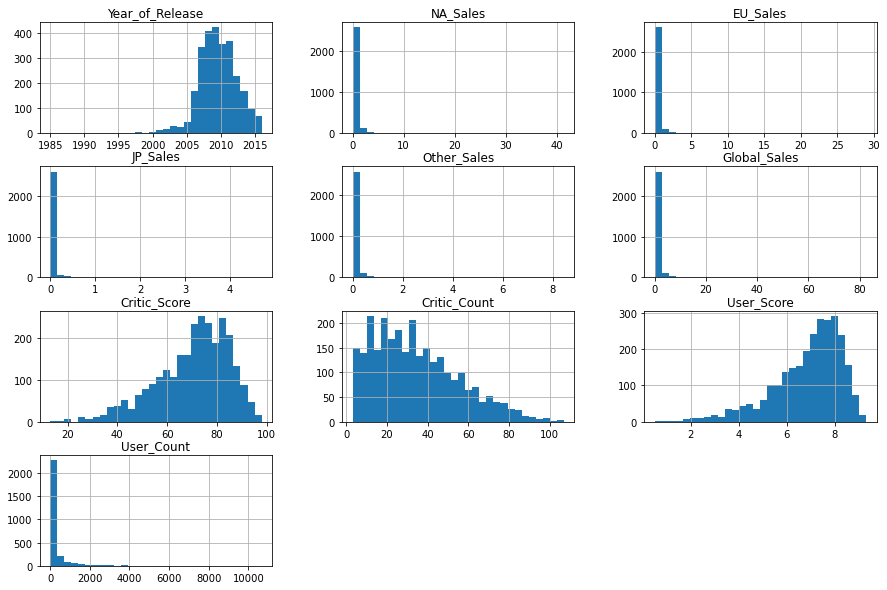

In [24]:
games1.hist(bins=30, figsize=(15,10))

<AxesSubplot:>

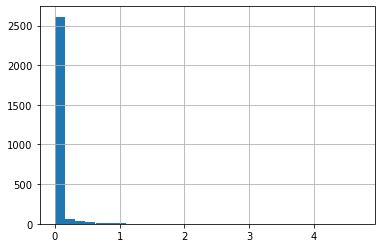

In [26]:
games1.JP_Sales.hist(bins=30)

(0.0, 5.0)

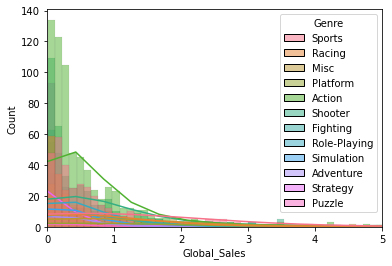

In [39]:
sns.histplot(data=games1, x='Global_Sales', hue='Genre', kde=True)
plt.xlim(0,5.0)

(0.0, 3.0)

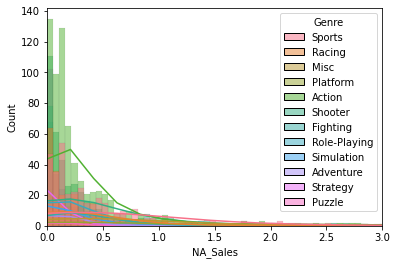

In [46]:
sns.histplot(data=games1, x='NA_Sales', hue='Genre', kde=True)
plt.xlim(0, 3.0)

(0.0, 3.0)

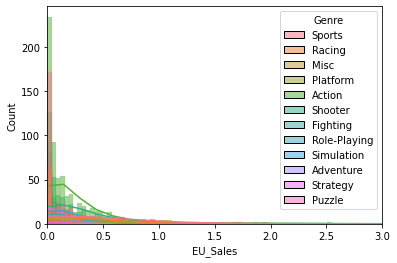

In [50]:
sns.histplot(data=games1, x='EU_Sales', hue='Genre', kde=True)
plt.xlim(0, 3.0)

In [36]:
games1.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000
mean,2009.336598,0.464897,0.296257,0.042492,0.097048,0.900871,70.434168,34.164309,6.868698,302.502358
std,2.781185,1.312277,0.898726,0.221634,0.275604,2.566916,14.457928,20.922663,1.454876,804.798548
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2008.000000,0.050000,0.020000,0.000000,0.010000,0.120000,62.000000,17.000000,6.100000,20.000000
50%,2009.000000,0.160000,0.080000,0.000000,0.030000,0.320000,73.000000,31.000000,7.200000,54.000000
75%,2011.000000,0.430000,0.290000,0.010000,0.090000,0.870000,81.000000,48.000000,7.900000,203.000000
max,2016.000000,41.360000,28.960000,4.700000,8.450000,82.530000,98.000000,107.000000,9.300000,10665.000000


Try to make distribution of NA_Sales more 'normal' by taking cube root

(0.0, 3.0)

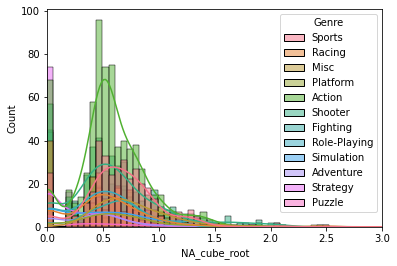

In [54]:
games1['NA_cube_root'] = np.power((games1['NA_Sales']), 1/3)
sns.histplot(data=games1, x='NA_cube_root', hue='Genre', kde=True)
plt.xlim(0, 3.0)

(0.0, 3.0)

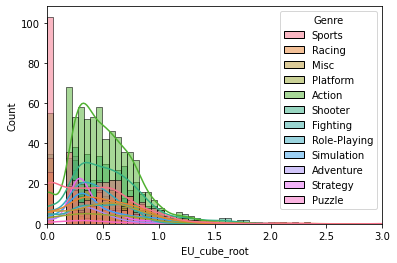

In [55]:
games1['EU_cube_root'] = np.power((games1['EU_Sales']), 1/3)
sns.histplot(data=games1, x='EU_cube_root', hue='Genre', kde=True)
plt.xlim(0,3.0)

<AxesSubplot:xlabel='Critic_Score', ylabel='Count'>

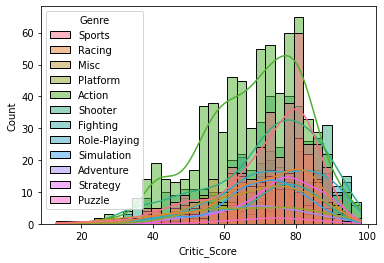

In [57]:
# plot histogram of critic score values to check distribution
sns.histplot(data=games1, x='Critic_Score', hue='Genre', kde=True)

<AxesSubplot:xlabel='User_Score', ylabel='Count'>

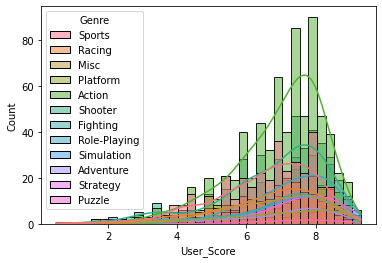

In [59]:
# plot histogram of user score values to check distribution
sns.histplot(data=games1, x='User_Score', hue='Genre', kde=True)

<AxesSubplot:xlabel='square_user_score', ylabel='Count'>

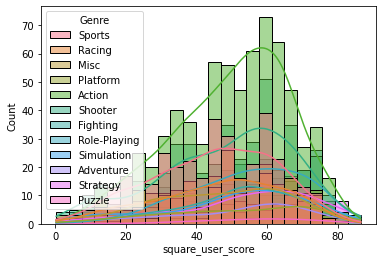

In [61]:
# square user score to get distribution more normalized
games1['square_user_score'] = np.power((games1['User_Score']), 2)
sns.histplot(data=games1, x='square_user_score', hue='Genre', kde=True)

<AxesSubplot:xlabel='User_Count', ylabel='Count'>

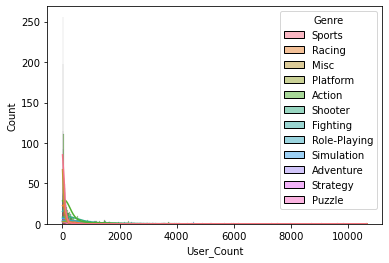

In [63]:
# check distribution of critic count by genere
sns.histplot(data=games1, x='User_Count', hue='Genre', kde=True)

<AxesSubplot:xlabel='JP_Sales', ylabel='Count'>

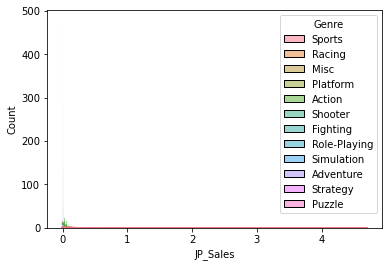

In [62]:
# check distribution of japan sales
sns.histplot(data=games1, x='JP_Sales', hue='Genre', kde=True)

<AxesSubplot:>

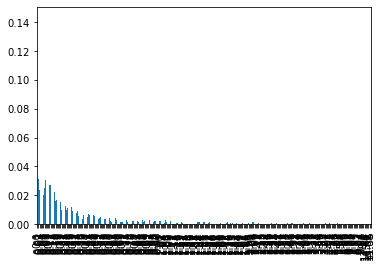

In [65]:
# plot probability mass function of na_sales
pmf = games1.NA_Sales.value_counts().sort_index() / len (games1.NA_Sales)
pmf.plot(kind='bar')

Text(0, 0.5, 'Total Games')

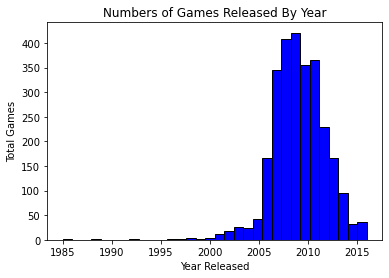

In [66]:
# display distribution of number of games released each year in data set
years = games1['Year_of_Release'].max() - games1['Year_of_Release'].min() + 1
plt.hist(games1['Year_of_Release'], bins=years, color='blue', edgecolor='black')
plt.title('Numbers of Games Released By Year')
plt.xlabel('Year Released')
plt.ylabel('Total Games')

Text(0, 0.5, 'probability')

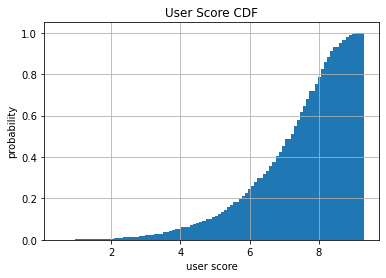

In [70]:
games1['User_Score'].hist(cumulative=True, density=1, bins=100)
plt.title('User Score CDF')
plt.xlabel('user score')
plt.ylabel('probability')

<AxesSubplot:>

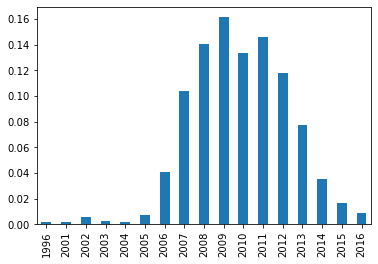

In [82]:
# create subset of critic scores for action genre only (highest selling)
action_year_release = games1[games1.Genre == 'Action']
non_action_year_release = games1[games1.Genre != 'Action']
action_pmf = action_critic_score['Year_of_Release'].value_counts().sort_index() / len(action_critic_score['Year_of_Release'])
action_pmf.plot(kind='bar')

C:\Users\taylo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\taylo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


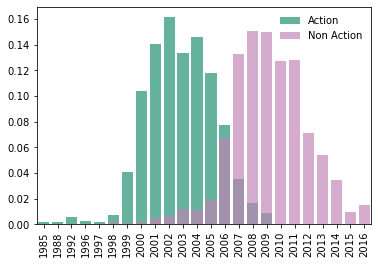

In [105]:
# see PMFs for action genres vs non action genres and year of release
action_probs = action_year_release['Year_of_Release'].value_counts(normalize=True)
non_action_probs = non_action_year_release['Year_of_Release'].value_counts(normalize=True)

current_palette = sns.color_palette('colorblind')

sns.barplot(action_probs.index, action_probs.values, label='Action', color=current_palette[2], alpha=.66)
sns.barplot(non_action_probs.index, non_action_probs.values, label='Non Action', color=current_palette[4], alpha=.66)

plt.legend(frameon=False)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

Scatter Plots to check for linear relationships between two variables

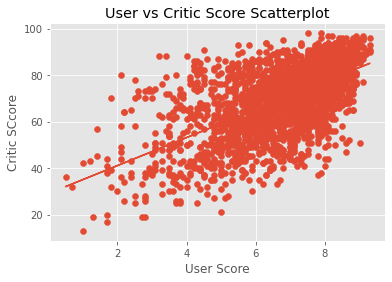

In [109]:
# scatter plot between critic and user scores to check for linear relationship via plt
plt.style.use('ggplot')
x=games1['User_Score']
y=games1['Critic_Score']

plt.scatter(x, y, marker='o', )

m,b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.title('User vs Critic Score Scatterplot')
plt.xlabel('User Score')
plt.ylabel('Critic SCcore')
plt.show()

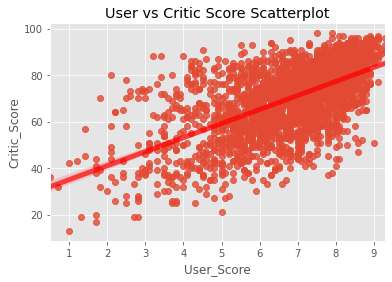

In [111]:
# scatter plot between critic and user scores to check for linear relationship via seaborn
sns.regplot(x=games1['User_Score'], y=games1['Critic_Score'], line_kws={"color":"r", "alpha":0.7,"lw":5})
plt.title('User vs Critic Score Scatterplot')
plt.show()

Text(0.5, 1.0, 'Boxplot of Global_Sales')

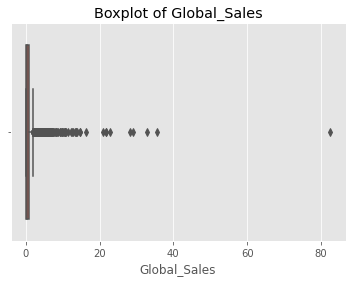

In [116]:
# seaborn box plot to check for outlier and variability
sns.boxplot(x=games1['Global_Sales'])
plt.title('Boxplot of Global_Sales')

In [117]:
games1.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,NA_cube_root,EU_cube_root,square_user_score
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,3.458280,3.070904,64.00
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,2.502930,2.336775,68.89
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,2.499200,2.219253,64.00
3,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,2.407845,2.093860,43.56
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,2.435131,1.907450,70.56
5,Wii Fit,Wii,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,2.073902,2.002497,59.29
6,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,2.466212,1.697343,39.69
7,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E,2.080854,2.040027,54.76
8,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,1.914751,2.086994,67.24
9,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M,2.129736,1.725789,65.61


In [118]:
# subset of games1 dataframe for games with global sales < $20M to account for outliers
games2 = games1[games1['Global_Sales'] < 20.0]

##### Other vs Global Sales with and without outlier dataframes (games1, games2)

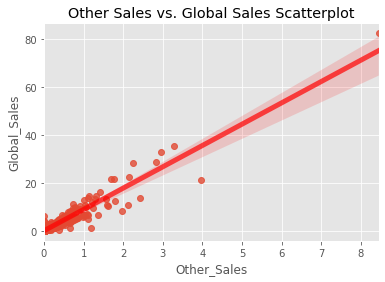

In [112]:
# scatter plot with regression line via seaborn with games1 dataframe
# no account for outliers e.g., Wii Sports
sns.regplot(x=games1['Other_Sales'], y=games1['Global_Sales'], line_kws={"color":"r", "alpha":0.7,"lw":5})
plt.title('Other Sales vs. Global Sales Scatterplot')
plt.show()

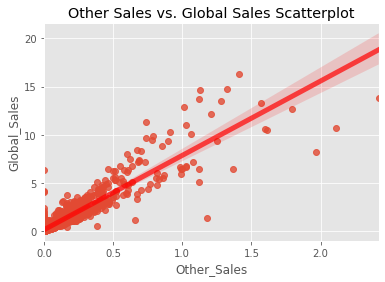

In [119]:
# scatter plot with regression line via seaborn with games2 dataframe
# account for outliers
sns.regplot(x=games2['Other_Sales'], y=games2['Global_Sales'], line_kws={"color":"r", "alpha":0.7,"lw":5})
plt.title('Other Sales vs. Global Sales Scatterplot')
plt.show()

Testing hypothesis via correlation tests

In [130]:
# test pearson's r against two relationships
# critic vs user score & other vs global sales
cor1, p_val1 = sp.stats.pearsonr(games2['User_Score'], games2['Critic_Score'])
print('User Score Correlation Test via Pearson r [User vs Critic Score]')
print('Coefficient:\t{}\nP-value:\t{}'.format(round(cor1,3),p_val1,7))

User Score Correlation Test via Pearson r [User vs Critic Score]
Coefficient:	0.606
P-value:	4.163824979394153e-275


In [132]:
# other sales vs global sales
cor2, p_val2 = sp.stats.pearsonr(games2['Other_Sales'], games2['Global_Sales'])
print('User Score Correlation Test via Pearson r [Other vs Global Sales]')
print('Coefficient:\t{}\nP-value:\t{}'.format(round(cor2,3),p_val2,7))

User Score Correlation Test via Pearson r [Other vs Global Sales]
Coefficient:	0.919
P-value:	0.0


In [133]:
games2.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,NA_cube_root,EU_cube_root,square_user_score
count,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000
mean,2009.339156,0.415109,0.261103,0.033235,0.086689,0.796325,70.409753,34.090975,6.866121,301.220888,0.560384,0.467033,49.262762
std,2.782879,0.816147,0.534290,0.130710,0.175231,1.473062,14.460654,20.898957,1.455994,802.937070,0.356718,0.312528,17.905035
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,0.000000,0.000000,0.250000
25%,2008.000000,0.050000,0.020000,0.000000,0.010000,0.120000,62.000000,17.000000,6.100000,20.000000,0.368403,0.271442,37.210000
50%,2009.000000,0.160000,0.080000,0.000000,0.030000,0.320000,73.000000,31.000000,7.200000,54.000000,0.542884,0.430887,51.840000
75%,2011.000000,0.430000,0.280000,0.010000,0.090000,0.862500,81.000000,48.000000,7.900000,201.250000,0.754784,0.654213,62.410000
max,2016.000000,9.700000,6.420000,2.660000,2.420000,16.270000,98.000000,107.000000,9.300000,10665.000000,2.132671,1.858568,86.490000
